In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Every expression’s output in that cell will be shown — not just the last one('with the help of this expression').

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Airline Flight Price Analysis

Airlines are one of the most widely used modes of transportation, connecting people across cities and countries efficiently.This dataset provides flight-related details such as airline name, source and destination cities, departure and arrival times, number of stops, travel class, flight duration, days left before departure, and ticket price.It can also be used to estimate or predict flight prices based on these details.
- The concept of airlines began in the early 20th century.
- Foundation for airlines:Wright brothers — Orville and Wilbur Wright
- Year:1903

# Data Exploration and Understanding

#### Load the Dataset

In [196]:
df=pd.read_csv(r'C:\Users\ASUS\Downloads\airlines_flights_data1.csv')
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
306151,220775,Air_India,AI-441,Delhi,Evening,one,Night,Hyderabad,Business,27.75,31,39321.0
306152,7321,Indigo,6E-369,Delhi,Night,one,Morning,Mumbai,Economy,10.42,37,3546.0
306153,73373,Air_India,AI-442,Mumbai,Afternoon,one,Morning,Hyderabad,Economy,18.92,23,4173.0
306154,181940,GO_FIRST,G8-304,Chennai,Afternoon,one,Late_Night,Delhi,Economy,11.08,14,7352.0


### Sample from the airline dataset

In [9]:
df.sample(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
77097,77097,Vistara,UK-970,Mumbai,Morning,one,Evening,Hyderabad,Economy,11.08,48,4099.0
270150,270150,Vistara,UK-772,Kolkata,Morning,one,Night,Bangalore,Business,10.50,48,52287.0
159702,159702,Vistara,UK-880,Hyderabad,Afternoon,one,Night,Mumbai,Economy,8.58,11,10248.0
303307,16624,Indigo,6E-788,Delhi,Afternoon,one,Night,Bangalore,Economy,9.83,33,5698.0
166885,166885,Indigo,6E-827,Hyderabad,Morning,zero,Afternoon,Bangalore,Economy,1.33,16,2353.0


#### Observation

- The sample shows the few dataset rows,if the dataset is loaded successfully or not.

### Structure of the dataset

In [10]:
df.shape

(306156, 12)

#### Observation

- With the null values,dataset contain the 306156 rows and 12 columns with various airline industries and there tickect fare and duration of the destinations.

### Columns in the Dataset

In [12]:
df.columns.tolist()

['index',
 'airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

### Checking the Null Values

In [11]:
df.isnull().sum()

index                  0
airline             6004
flight                 0
source_city            0
departure_time         0
stops                  0
arrival_time           0
destination_city       0
class                  0
duration            6004
days_left              0
price               6004
dtype: int64

#### Observation

- Columns(airline,duration,price) contains the null values

### Summary of the Dataset and Data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306156 entries, 0 to 306155
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             306156 non-null  int64  
 1   airline           300152 non-null  object 
 2   flight            306156 non-null  object 
 3   source_city       306156 non-null  object 
 4   departure_time    306156 non-null  object 
 5   stops             306156 non-null  object 
 6   arrival_time      306156 non-null  object 
 7   destination_city  306156 non-null  object 
 8   class             306156 non-null  object 
 9   duration          300152 non-null  float64
 10  days_left         306156 non-null  int64  
 11  price             300152 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 28.0+ MB


#### Observation
- Rows:306155
- columns:12
- Non-Null Count:9 columns have the no null-values
- Numerical Columns: 4 columns are numerical(index,duration,days_left,price)
- Categorical Columns: 8 columns including airline,flight ect..
- Memory Usage:28.0+ MB of memory

### Summary Statistics of numerical columns

In [15]:
df.describe()

,index,duration,days_left,price
count,306156.000000,300152.000000,306156.000000,300152.000000
mean,150061.897062,12.222900,26.005095,20890.477042
std,86647.373710,7.192281,13.559849,22699.258400
min,0.000000,0.830000,1.000000,1105.000000
25%,75016.750000,6.830000,15.000000,4783.000000
50%,150082.500000,11.250000,26.000000,7425.000000
75%,225111.250000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


#### Observation
- It shows us the statistics like mean,count,min,std,qurtiles of all numerical columns

#### Categorical columns

In [16]:
df.describe(include='O')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300152,306156,306156,306156,306156,306156,306156,306156
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127867,3296,62598,72526,255939,93343,60245,210811


#### Understanding of Categorical columns

In [17]:
df['airline'].value_counts()

airline
Vistara      127867
Air_India     80904
Indigo        43148
GO_FIRST      23142
AirAsia       16084
SpiceJet       9007
Name: count, dtype: int64

#### Observation
- It shows us the how many type of airlines are active in present and how many times they are appeared.

In [18]:
df['flight'].value_counts()

flight
UK-706     3296
UK-772     2794
UK-720     2707
UK-836     2577
UK-822     2524
           ... 
G8-405        1
6E-3211       1
SG-1058       1
6E-865        1
SG-9974       1
Name: count, Length: 1561, dtype: int64

#### Observation
- There are 1561 unique flight codes in my dataset.
- Each row here means that particular flight code appears that many times in my data.
- 1561 different flights operated across all routes.

In [20]:
df['source_city'].value_counts()

source_city
Delhi        62598
Mumbai       62142
Bangalore    53067
Kolkata      47243
Hyderabad    41660
Chennai      39446
Name: count, dtype: int64

#### Observation
- This shows from which city the flights are being departed and how many time each city appears.

In [21]:
df['departure_time'].value_counts()

departure_time
Morning          72526
Early_Morning    68097
Evening          66462
Night            48970
Afternoon        48764
Late_Night        1337
Name: count, dtype: int64

#### Observation
- It shows in which time the flights are been departed and how many flights are departued in that time.

In [22]:
df['stops'].value_counts()

stops
one            255939
zero            36695
two_or_more     13522
Name: count, dtype: int64

#### Observation
- It shows how many flights have the no.of stops.

In [23]:
df['arrival_time'].value_counts()

arrival_time
Night            93343
Evening          79925
Morning          63995
Afternoon        38882
Early_Morning    15702
Late_Night       14309
Name: count, dtype: int64

#### Observation
- It counts how many flights arrive at each arrival time and we can see how frequently each arrival category appears.
- Here we can observe most no.of flights are arrive at night.

In [24]:
df['destination_city'].value_counts()

destination_city
Mumbai       60245
Delhi        58528
Bangalore    52040
Kolkata      50515
Hyderabad    43608
Chennai      41220
Name: count, dtype: int64

#### Observation
- Here we can see the destination citys of the fligts and no.of flights are arriving at each destination.
- This means Mumbai receives the most no.of flights.

In [25]:
df['class'].value_counts()

class
Economy     210811
Business     95345
Name: count, dtype: int64

#### Observation
- This shows how many type of class are present in flight,and we can see there are only two types of class(Economy,Bussiness) and most no.of people are prefering the economy class rather than bussiness class.

### Grouping the Columns

In [10]:
Numerical_cols= df.select_dtypes(include=['int64','float64'])
Categorical_cols=df.select_dtypes(include=['category','object'])

In [34]:
print('Numerical_columns:',Numerical_cols.columns.tolist())
print('Categorical_columns:',Categorical_cols.columns.tolist())

Numerical_columns: ['index', 'duration', 'days_left', 'price']
Categorical_columns: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


### Checking the Target variable in the dataset

- yes- there is a target variable in my dataset and i.e Price column.
- It is dependent column based on the other columns the Price column will change.
- We can predict the fare of flight based on other columns. 

In [37]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0


#### Observation
- As seen there are no data quality issues like typos,and inconsistent formating.

### Checking for duplicate values

In [197]:
df.duplicated().sum()

np.int64(6003)

#### Observation 
- As seen above there are duplicated values in our data set.
- We have to drop duplicates using the appropriate technique.

### Removing Duplicates

In [198]:
df.drop_duplicates(inplace=True)

In [199]:
df.duplicated().sum()

np.int64(0)

#### Observation
- Removed the duplicates using an proper technique and we can see there are no duplicates in the dataframe.

### Detecting How Many No.of outliers

- IQR (interquartile range) is used to detect the outlier in all numerical columns.
##### Steps:
- Calculate the Q1(25th percentile) and Q3(75th percentile)
- Find IQR=Q3-Q1
- Define Lower and Upper Bound
- Lower Bound: Q1-1.5 * IQR
- Upper Bound: Q3+1.5 * IQR
- Any value outside this range is considered as outlier

In [6]:
# Method1

In [200]:
outliers = {}
for col in Numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower) | (df[col] > upper)]
    if not outlier_values.empty:
        outliers[col] = outlier_values.values.tolist()
print("Outliers found in each column:")
for col, values in outliers.items():
    print(f"{col}: {len(values)} outliers")

Outliers found in each column:
duration: 2093 outliers
price: 122 outliers


In [7]:
#Method2

In [60]:
for col in Numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower) | (df[col] > upper)][col].count()
    print(f"{col}: {outliers_count} outliers")


index: 0 outliers
duration: 2093 outliers
days_left: 0 outliers
price: 122 outliers


### Outliers in duration & price

<Axes: xlabel='duration'>

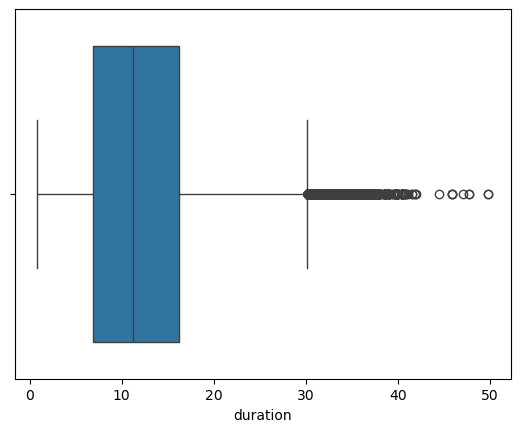

In [201]:
sns.boxplot(data=df,x='duration')

<Axes: xlabel='price'>

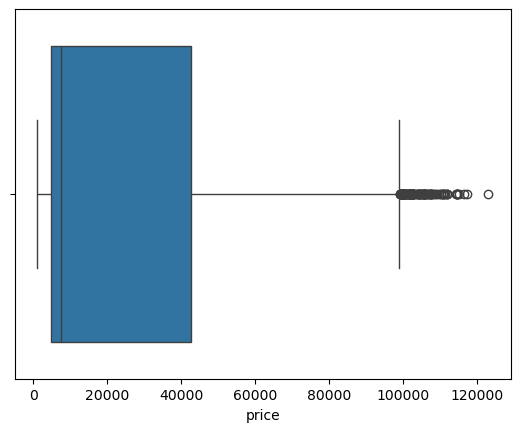

In [202]:
sns.boxplot(data=df,x='price')

#### Detecting the outliers

In [7]:
# Detecting outliers at a time using the FOR loop.

In [206]:
outlier_cols = ['duration', 'price']
outlier_stats = {}

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outlier_stats[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_fence': lower_fence,
        'upper_fence': upper_fence
    }
    
for col, stats in outlier_stats.items():
    print(f"\n Outlier stats for {col}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")



 Outlier stats for duration:
  Q1: 6.83
  Q3: 16.17
  IQR: 9.340000000000002
  lower_fence: -7.1800000000000015
  upper_fence: 30.180000000000003

 Outlier stats for price:
  Q1: 4783.0
  Q3: 42521.0
  IQR: 37738.0
  lower_fence: -51824.0
  upper_fence: 99128.0


In [9]:
#Detecting them seperately

#### Outliers of duration

In [209]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

Q1: 6.83
Q3: 16.17
IQR: 9.340000000000002
Lower Fence: -7.1800000000000015
Upper Fence: 30.180000000000003


#### Outliers of price

In [207]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
Lower_fence = Q1 - 1.5 * IQR
Upper_fence = Q3 + 1.5 * IQR
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Fence: {Lower_fence}")
print(f"Upper Fence: {Upper_fence}")

Q1: 4783.0
Q3: 42521.0
IQR: 37738.0
Lower Fence: -51824.0
Upper Fence: 99128.0


#### After removing the outliers in both columns

In [210]:
df=df[(df['duration']>=lower_fence) & (df['duration']<=upper_fence)]

<Axes: xlabel='duration'>

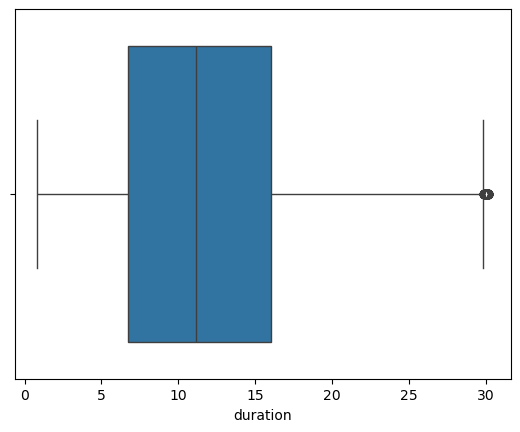

In [212]:
sns.boxplot(data=df,x='duration')

In [211]:
df=df[(df['price']>=Lower_fence) & (df['price']<=Upper_fence)]

<Axes: xlabel='price'>

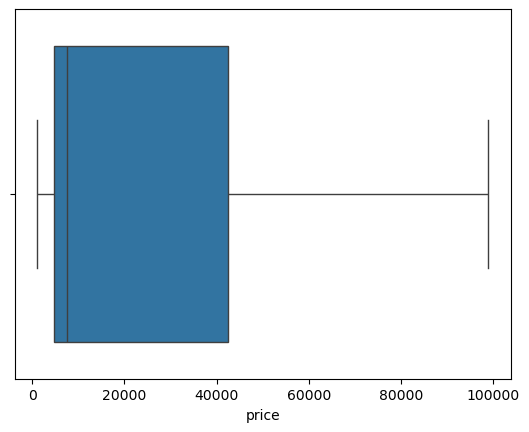

In [213]:
sns.boxplot(data=df,x='price')

- Filtered the outliers using the IQR Method in both duration and price columns.
- By calculating upper and lower limits and filtered using & operator to keep the values b/w the range.

## Final Summary after Data Exploration & Data Understanding

- Dataset Structure/Shape: 300153crows x 12 columns
- Column Types: 4 Numerical columns + 8 Categorical
- Missing Values:There are Some missing entries in airline,duration,price columns
- Outliers: Found in duration & price columnn,not much extreme outliers but closer to upper bound in both columns.
- Duplicated values: Removed using the drop method.
##### Object column insights:
- Vistara airlines dominated the airline industry and have more no.of flights.
- Flight code with UK-706 appeared more no.of times.
- Delhi have the more no.of flight departure.
- Most of the flights are departed in the morning.
- Most of the flights have one stops b\w the departure city to destination city.
- Mumbai is the more frequent city for the most no.of flights.
- Maximum flights are arrived at night.
- More no.of people prefered economy class than bussiness class.  

# Data Cleaning & Manipulation

- Identify columns having missing or null values.

In [74]:
df.isnull().sum()

index                  0
airline             3002
flight                 0
source_city            0
departure_time         0
stops                  0
arrival_time           0
destination_city       0
class                  0
duration            3002
days_left              0
price               3002
dtype: int64

#### Grouped the  null-value columns into list

In [66]:
df.columns[df.isnull().any()].tolist()

['airline', 'duration', 'price']

In [8]:
df['airline']=df['airline'].fillna(df['airline'].mode()[0])
df['duration']=df['duration'].fillna(df['duration'].median())
df['price']=df['price'].fillna(df['price'].median())

In [214]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#### Observation
- Fill the null-values using the mode for categorical columns and median for numerical columns.
- Why median because for numerical column because median will not affect by outliers.

In [78]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0


#### Observation
- There is no need of fixing the inconsistencies in the categorical columns like spellings,formating and cases(lower/upper).
- Remove unnecessary whitespace or special characters. 
- Standardize categories to avoid fragmentation of groups.

## Non-visual bivariate analysis

- Categorical vs Categorical: Compare group-wise counts (e.g., Gender vs Department).
- Categorical vs Numerical: Analyze averages or medians for each group (e.g., Average Salary per Department). 
- Numerical vs Numerical: Explore correlation or differences in trends (e.g., Age vs Income).

### Categorical-Categorical

1. Which Airlines offer which class category most?

In [215]:
pd.crosstab(df['airline'],df['class'])

class,Business,Economy
airline,,
AirAsia,0,15919
Air_India,32503,46313
GO_FIRST,0,22924
Indigo,0,42706
SpiceJet,0,8925
Vistara,59702,65944


#### Observation
- Shows which airline offers which category more.
- Which airline offers tickets\flights in both the category and only single category.
- Here only Air_india and vistara are offering flights\tickets in both categories.
- Remaining only focus only on Economy class to attract the more customers.

2. See which airlines operates the most non-stop,one-stop and two or more stops?

In [216]:
pd.crosstab(df['airline'],df['stops'],margins=True)

stops,one,two_or_more,zero,All
airline,,,,
AirAsia,11291,2225,2403,15919
Air_India,69429,3035,6352,78816
GO_FIRST,19336,398,3190,22924
Indigo,30858,735,11113,42706
SpiceJet,6491,0,2434,8925
Vistara,109574,5925,10147,125646
All,246979,12318,35639,294936


#### Observation
- This cross-tabulation shows the distribution of flights by airline and stop type, indicating which airlines operate more non-stop or connecting flights between cities.
- As we seen here indigo offers more non-stop flights than the connecting flights follow vistara.
- Vistara have the more no.of flights follows the Air_india.
- There are a total of 35,639 non-stop flights operated by all airlines combined.
- A total of 259,297 connecting flights are operated by all airlines with one and two+ stops.

3. What is the percentage distribution of flight classes (Business and Economy) offered by each airline?

In [217]:
pd.crosstab(df['airline'], df['class'], normalize='index') * 100

class,Business,Economy
airline,,
AirAsia,0.000000,100.000000
Air_India,41.239089,58.760911
GO_FIRST,0.000000,100.000000
Indigo,0.000000,100.000000
SpiceJet,0.000000,100.000000
Vistara,47.516037,52.483963


#### Observation
- I've just normalized the count of each airline with class category into percentages.
- To know which airline offers which category more in precentage proportions.

4. Which airline have the most number of flight operations across all stops?

In [218]:
df.groupby(['airline', 'stops']).size().idxmax()

('Vistara', 'one')

#### Observation
- Vistara operates the highest no.of flights across all stop categories.

5.Which airlines have more flights arriving at specific time slots?

In [219]:
df.groupby('airline')['arrival_time'].value_counts()

airline    arrival_time 
AirAsia    Late_Night        3448
           Night             3443
           Morning           2869
           Evening           2735
           Afternoon         2028
           Early_Morning     1396
Air_India  Night            23783
           Morning          20324
           Evening          18025
           Afternoon        11304
           Early_Morning     3325
           Late_Night        2055
GO_FIRST   Night             6960
           Evening           4457
           Afternoon         3342
           Late_Night        2750
           Morning           2734
           Early_Morning     2681
Indigo     Night            12586
           Evening          11474
           Afternoon         7291
           Morning           5409
           Late_Night        3420
           Early_Morning     2526
SpiceJet   Night             3032
           Morning           2506
           Evening           1388
           Afternoon          834
           Early_Mornin

#### Observation
- Most of the AirAsia flights arrive at Late_Night to take the advantage of cheaper airport slot followed by Indigo,while Vistara have more Night and Evening arrivals may due to longer-routes and international connections.
- Across all airlines, Night is the most common arrival window, followed by Evening and Morning.

### Categorical-Numerical

In [12]:
Categorical_cols.columns.tolist()
Numerical_cols.columns.tolist()

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

['index', 'duration', 'days_left', 'price']

1. What are the top 3 highest prices of each airlines?

In [341]:
result=df.groupby('airline')['price'].nlargest(2).reset_index()
result=result.drop(columns=['level_1'])
result

,airline,price
0,AirAsia,31917.0
1,AirAsia,31799.0
2,Air_India,90970.0
3,Air_India,89257.0
4,GO_FIRST,32803.0
5,GO_FIRST,31773.0
6,Indigo,31952.0
7,Indigo,30735.0
8,SpiceJet,34158.0
9,SpiceJet,27769.0


#### Obseravtion
- Vistara has the max no.of ticket prices among the others.

2. How does the price vary between Business and Economy class flights?

In [221]:
df.groupby('class')['price'].agg(['mean','min','max'])

,mean,min,max
class,,,
Business,52445.270148,12000.0,98972.0
Economy,6530.520966,1105.0,42349.0


#### Obseravtion
- As we can see based on the class the price variation is provided and bussiness class has the max price with 98972/-.

3. What is the average price of each class category for every airlines?

In [222]:
pd.pivot_table(df,index='airline',columns='class',values='price',aggfunc='max').fillna(0)

class,Business,Economy
airline,,
AirAsia,0.0,31917.0
Air_India,90970.0,42349.0
GO_FIRST,0.0,32803.0
Indigo,0.0,31952.0
SpiceJet,0.0,34158.0
Vistara,98972.0,37646.0


#### Obseravtion
- Here we can see over all sum of economy and bussiness classes prices 'AirAsia' has the lowest average price as compared to others and Indigo too is colse enough.

4. What is the Maximum price for each stop for every airlines providing?

In [223]:
df.groupby(['stops','airline'])['price'].max().sort_values()

stops        airline  
two_or_more  GO_FIRST     14861.0
zero         AirAsia      20402.0
             GO_FIRST     20874.0
             SpiceJet     20874.0
             Indigo       21058.0
two_or_more  AirAsia      25406.0
             Indigo       29213.0
one          AirAsia      31917.0
             Indigo       31952.0
             GO_FIRST     32803.0
             SpiceJet     34158.0
zero         Air_India    56788.0
             Vistara      59573.0
two_or_more  Air_India    80756.0
one          Air_India    90970.0
two_or_more  Vistara      98904.0
one          Vistara      98972.0
Name: price, dtype: float64

#### Observation
- We can see GO_FIRST has the less price among the airlines with two_or_more stops.
- As we  can see vistara has the maximum price with one-stop.

5. Which airline provides the shortest average flight duration?

In [224]:
df.groupby('airline')['duration'].mean().sort_values()

airline
Indigo        5.795451
GO_FIRST      8.755706
AirAsia       8.940926
SpiceJet     12.594765
Vistara      13.205722
Air_India    15.204545
Name: duration, dtype: float64

#### Observation
- It shows which airlines provides the average shortest duration for each airlines.
- Indigo is providing the sort avg duration.                                                                

6. Which city pair (source → destination) has the cheapest route?

In [225]:
df.groupby(['source_city','destination_city'])['price'].min().sort_values(ascending=False)

source_city  destination_city
Kolkata      Bangalore           3465.0
             Mumbai              3379.0
Delhi        Bangalore           3090.0
Bangalore    Kolkata             3026.0
Kolkata      Delhi               2994.0
             Chennai             2966.0
Mumbai       Kolkata             2835.0
Bangalore    Delhi               2723.0
Delhi        Kolkata             2480.0
Kolkata      Hyderabad           2436.0
Chennai      Kolkata             2359.0
Mumbai       Delhi               2336.0
Delhi        Mumbai              2281.0
Hyderabad    Mumbai              2250.0
             Delhi               2200.0
Bangalore    Mumbai              2150.0
Mumbai       Hyderabad           2105.0
             Bangalore           2074.0
Hyderabad    Kolkata             2056.0
Chennai      Delhi               2051.0
Delhi        Hyderabad           2022.0
             Chennai             1998.0
Mumbai       Chennai             1890.0
Chennai      Mumbai              1830.0
Hyderabad 

#### Observation
- Routes like chennai-Bangalore,chennai-Hyderabad have the lowe-cost sort distance fares.

7. How does ticket price vary with respect to the no.of days_left?

In [226]:
df[['days_left', 'price']].corr()

,days_left,price
days_left,1.00000,-0.09068
price,-0.09068,1.00000


#### Obseravtion
- As we can see here the correlation is very weak negatively correlated -0.090
- That shows the price variation is less it shows weather you book early or late price variation is there but very less.

8. What is the price variation b\w the days_left and destination_city?

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='days_left', ylabel='price'>

Text(0.5, 1.0, 'Price Distribution by Destination City and Days Left')

Text(0.5, 0, 'Days Left Before Departure')

Text(0, 0.5, 'Ticket Price (₹)')

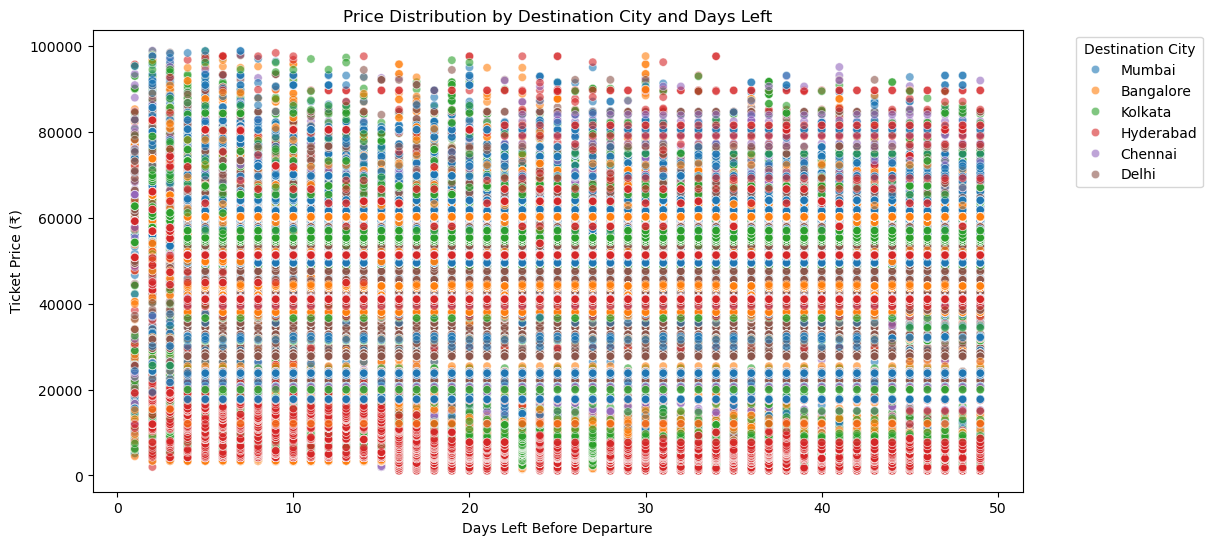

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='days_left', y='price', hue='destination_city', alpha=0.6)
plt.title('Price Distribution by Destination City and Days Left')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Ticket Price (₹)')
plt.legend(title='Destination City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Observation
- There is very slight increase in the price as days_left are decreasing.

9. What is the min,max Prices based on the no.of stops and destination_city?

In [228]:
pd.pivot_table(df,index='stops',columns='destination_city',values='price',aggfunc=['min','max'])

min                                            \
destination_city Bangalore Chennai   Delhi Hyderabad Kolkata  Mumbai   
stops                                                                  
one                 1755.0  1543.0  2051.0    1105.0  2056.0  1830.0   
two_or_more         2074.0  1998.0  2103.0    1966.0  2056.0  2203.0   
zero                1443.0  1543.0  2051.0    1105.0  2057.0  1830.0   

                       max                                                
destination_city Bangalore  Chennai    Delhi Hyderabad  Kolkata   Mumbai  
stops                                                                     
one                97767.0  98972.0  98543.0   98465.0  98919.0  98912.0  
two_or_more        92806.0  93563.0  73376.0   96587.0  98904.0  93615.0  
zero               59509.0  56950.0  59573.0   38470.0  59224.0  58216.0

#### Observation
- Destinatio_city Hyderabad having the min price with one and zero stops.

10. For each airline, which source-city have the max duration based on the departure_time?

In [229]:
df.groupby(['airline','source_city','departure_time'])['duration'].max().sort_values()

airline    source_city  departure_time
SpiceJet   Hyderabad    Night              2.08
Indigo     Hyderabad    Late_Night         2.17
SpiceJet   Chennai      Evening            2.42
           Bangalore    Night              3.00
           Hyderabad    Morning            6.42
                                          ...  
Air_India  Hyderabad    Morning           30.17
           Chennai      Evening           30.17
                        Early_Morning     30.17
           Bangalore    Morning           30.17
                        Early_Morning     30.17
Name: duration, Length: 187, dtype: float64

#### Observation
- Too Bengalore having the max duration 30 hrs with stops 2 or more.

11. Which airlines operate the longest non-stop flights?

In [230]:
df[df['stops'] == 'zero'].groupby('airline')['duration'].max().sort_values(ascending=False)

airline
Air_India    3.58
Indigo       3.17
SpiceJet     3.17
AirAsia      3.00
GO_FIRST     2.92
Vistara      2.92
Name: duration, dtype: float64

#### Observation
- Vistara operation the longest non-stop flight with 3.58 hrs with zero stops.

12.How does the number of stops affect average flight duration?

In [231]:
df.groupby('stops')['duration'].mean().sort_values()

stops
zero            2.191243
one            13.395646
two_or_more    14.127753
Name: duration, dtype: float64

#### Observation
- The no.of stops affecting duration, when stop count increases duration increases.
- we have avg duration of flight route with 2.2 hours with zero stops.

13. What is the average flight duration between each source and destination city pair?

In [233]:
df.groupby(['source_city', 'destination_city'])['duration'].mean().sort_values(ascending=False)

source_city  destination_city
Kolkata      Chennai             14.500814
Chennai      Kolkata             14.110127
Bangalore    Chennai             13.998878
Kolkata      Hyderabad           13.737013
Bangalore    Hyderabad           13.638647
Kolkata      Bangalore           13.633055
Chennai      Bangalore           13.410417
Hyderabad    Chennai             13.274534
             Kolkata             13.260180
Mumbai       Hyderabad           13.159552
Chennai      Hyderabad           13.066167
Bangalore    Kolkata             13.002406
Mumbai       Kolkata             12.781383
Delhi        Kolkata             12.698991
Mumbai       Chennai             12.614204
Kolkata      Mumbai              12.587383
Delhi        Hyderabad           12.467837
             Chennai             12.257166
Chennai      Mumbai              12.128491
Hyderabad    Bangalore           12.080258
             Mumbai              11.851096
Kolkata      Delhi               11.565908
Mumbai       Bangalore  

#### Observation
- kolkata-chennai and chennai-kolkata having longest avg duration.
- while mumbai-delhi and Bangalore-delhi are the sortest.

## Univariate Analysis

In [256]:
Numerical_cols.columns.tolist()
Categorical_cols.columns.tolist()

['index', 'duration', 'days_left', 'price']

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

1. Which Airline operates most no.of flights?

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='airline', ylabel='count'>

Text(0.5, 1.0, 'No.of flights per airline')

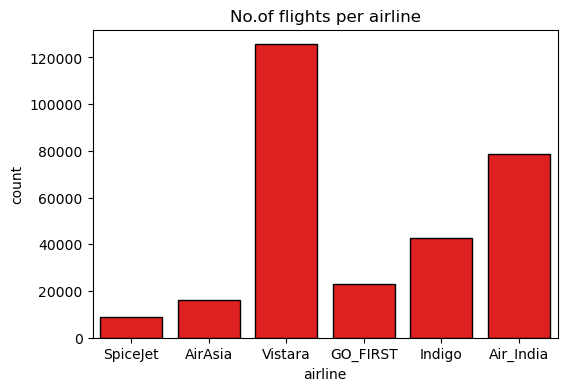

In [267]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='airline',color='red',edgecolor='black')
plt.title('No.of flights per airline')
plt.show()

#### Observation
- Vistara is dominating the airline industry with 120000+ flights and followed by Air_India.

2. How many stop types are there count?

<Figure size 400x500 with 0 Axes>

<Axes: xlabel='stops', ylabel='count'>

Text(0.5, 1.0, 'No.of stops types')

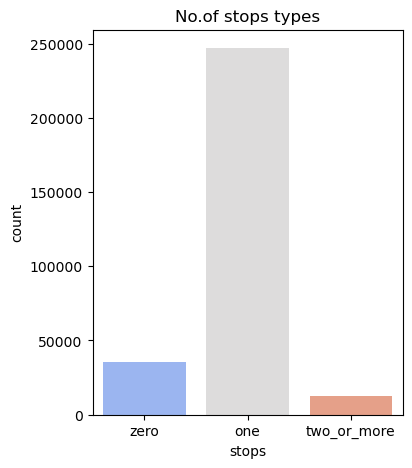

In [376]:
plt.figure(figsize=(4,5))
sns.countplot(data=df,x='stops',palette='coolwarm')
plt.title('No.of stops types')
plt.show()

#### Observation
- Most flights are connecting one-stop flights,non-stops are second most and least no.of flights are operating through 2 or more connecting-stops.

3. Distribution of flight price?

<Figure size 600x500 with 0 Axes>

<Axes: xlabel='price', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of prices')

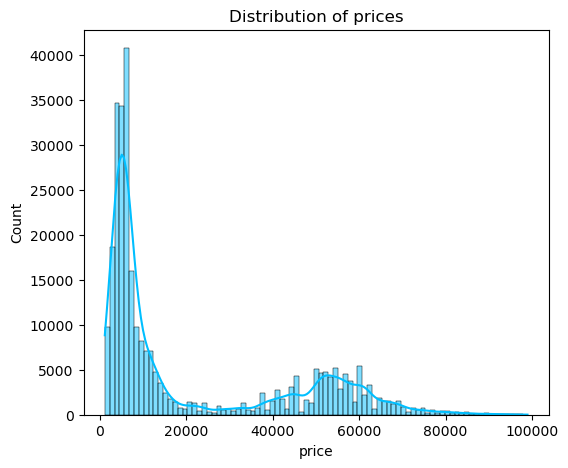

In [280]:
plt.figure(figsize=(6,5))
sns.histplot(data=df,x='price',kde=True,color='deepskyblue')
plt.title('Distribution of prices')
plt.show()

#### Observation
- Most flight price are between range 1000- 15000 with budget-friendly and affordable.
- There are very few flights between 20,000-40,000.
- As we can see there are some more flights between 40,000 to around 65,000 maybe bussiness class tickets.
- Very less no.of flights having the cost cut above 85,000 maybe they are non-stop flights with bussiness class.

4. Which airlines appear most frequently?

In [404]:
al=df['airline'].value_counts()

([<matplotlib.patches.Wedge at 0x1c88b59a990>,
 [Text(-1.1615665064792664, -0.5837493049465265, 'Vistara'),
  Text(0.9663828648354721, -0.5254561433196742, 'Air_India'),
  Text(0.769209195955229, 0.7863314904402027, 'Indigo'),
  Text(0.08276782783463964, 1.0968817104298603, 'GO_FIRST'),
  Text(-0.3652089724944348, 1.037604166534406, 'AirAsia'),
  Text(-0.6238863045844513, 0.9059613010233701, 'SpiceJet')],
 [Text(-0.7148101578333946, -0.3592303415055548, '42.60%'),
  Text(0.5271179262738938, -0.2866124418107313, '26.72%'),
  Text(0.41956865233921575, 0.42890808569465594, '14.48%'),
  Text(0.045146087909803435, 0.5982991147799237, '7.77%'),
  Text(-0.1992048940878735, 0.5659659090187669, '5.40%'),
  Text(-0.3403016206824279, 0.4941607096491109, '3.03%')])

Text(0.5, 1.0, 'Percentage of airlines')

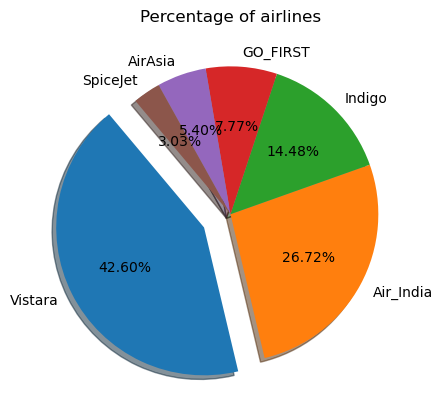

In [424]:
plt.pie(al.values,labels=al.index,autopct='%.2f%%',startangle=130,explode=(0.2,0,0,0,0,0),shadow=True)
plt.title('Percentage of airlines')
plt.show()

## Bivariate Analysis

1. How does price vary with stops?

<Figure size 500x600 with 0 Axes>

<Axes: ylabel='price'>

Text(0.5, 1.0, 'Price variation with no.of stops')

Text(0.5, 0, 'No.of stops')

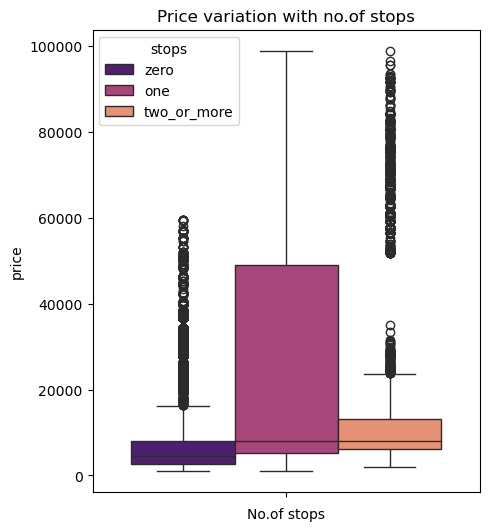

In [293]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df,y='price',hue='stops',palette='magma')
plt.title('Price variation with no.of stops')
plt.xlabel('No.of stops')
plt.show()

#### Observation
- Flights with zero stops are cheapest(direct flights) and price below 10k and are shortest route.
- Flights with one stop are expensive,often prefer for long routes and premimum bussiness class.
- Flights with two or more stops are cheaper than one-stop flights maybe the airlines is offering the discounts or indirect routes.

2. What is price variation between price and days left?

<Figure size 700x600 with 0 Axes>

<Axes: xlabel='days_left', ylabel='price'>

Text(0.5, 1.0, 'Price vs Days_left to departure')

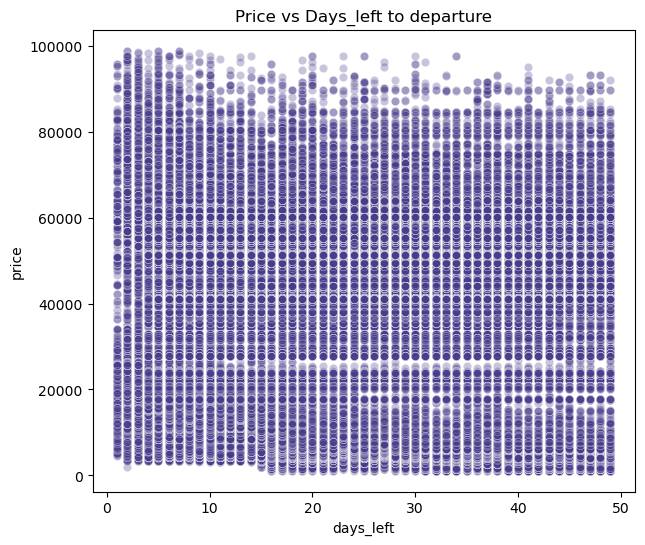

In [314]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df,y='price',x='days_left',alpha=0.3,color='darkslateblue')
plt.title('Price vs Days_left to departure')
plt.show()

#### Observation
- There is no huge price difference b/w price and days_left to departure.
- A very slight increase in price as days are decreasing.

3. Does class affect price?

<Figure size 500x400 with 0 Axes>

<Axes: xlabel='class', ylabel='price'>

Text(0.5, 1.0, 'Price Comparison between Classes')

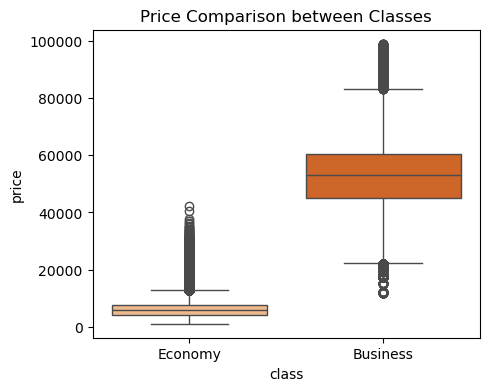

In [334]:
plt.figure(figsize=(5,4))
sns.boxplot(y='price',x='class', data=df,palette='Oranges')
plt.title('Price Comparison between Classes')
plt.show()

#### Observation
- Significantly economy class fares are low rated,but here we can see outliers in enonomy class due to last minute booking or long routes.
- Bussiness class fares are usually high compared to economy but we can see extrem prices due to demand or long routed.

4. How departure time effects the price?

<Axes: xlabel='departure_time', ylabel='price'>

Text(0.5, 1.0, 'Price Distribution by Departure Time')

Text(0.5, 0, 'Departure Time')

Text(0, 0.5, 'Flight Price')

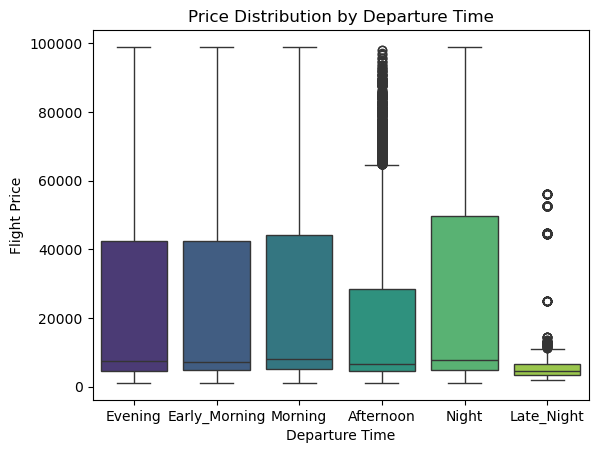

In [358]:
sns.boxplot(data=df, x='departure_time', y='price', palette='viridis')
plt.title('Price Distribution by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Flight Price')
plt.show()


#### Observation
- Outliers represent flight prices that are significantly higher than the rest. These could be due to last-minute bookings, premium airlines, business class seats, or limited availability on popular routes. They are valid data points but show the variability in flight pricing.
- The boxplot shows that flight prices vary with departure time. Late-night flights are generally cheaper, while morning and evening flights tend to be more expensive or have more variability. The outliers represent high-priced tickets due to premium services or peak-time demand.

5. Which airline is offering both classes?

<Axes: xlabel='airline', ylabel='count'>

Text(0.5, 1.0, 'Airlines vs class')

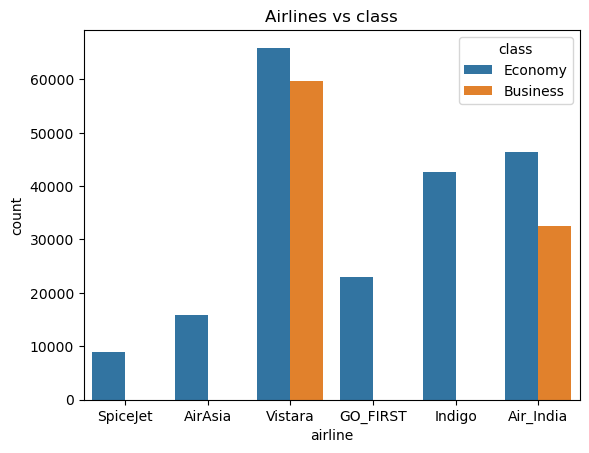

In [395]:
sns.countplot(data=df,x='airline',hue='class')
plt.title('Airlines vs class')
plt.show()

#### Observation 
- Vistara and Air_India are operating the both business and economy class.
- Also leading airlines with most no.of trips too is vistara airlines.

6. What is the Average price in each airline? 

In [393]:
df.groupby('airline')['price'].mean()

airline
AirAsia       4088.993467
Air_India    23679.959183
GO_FIRST      5652.373757
Indigo        5324.766145
SpiceJet      6182.631709
Vistara      30371.427367
Name: price, dtype: float64

<Axes: xlabel='airline', ylabel='price'>

Text(0.5, 1.0, 'Average price of each airline')

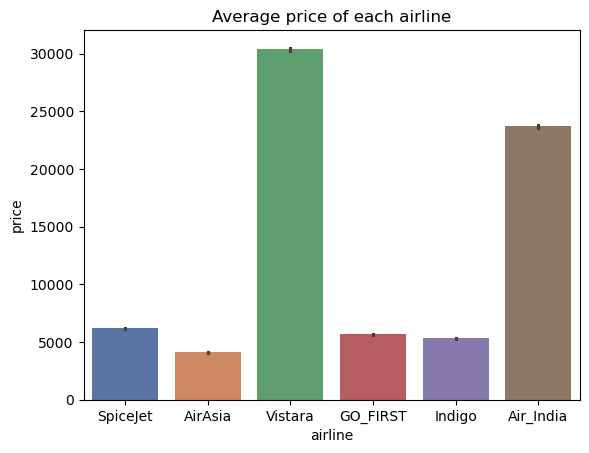

In [394]:
sns.barplot(data=df,x='airline',y='price',palette='deep')
plt.title('Average price of each airline')
plt.show()

#### Observation
- As we can see here AirAsia having the avg ticket price among the other airlines below 5k.
- So the AirAsia airlines is the cheapest airline with budget friendly and affordable ticket prices to travel.
- May be it is operating b/w the shortest routes,so it may have the less ticket prices.

## Multivariate Analysis

1. Duration by source city and number of stops

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='source_city', ylabel='duration'>

Text(0.5, 1.0, 'Duration vs Source City and Stops')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Bangalore'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Chennai')])

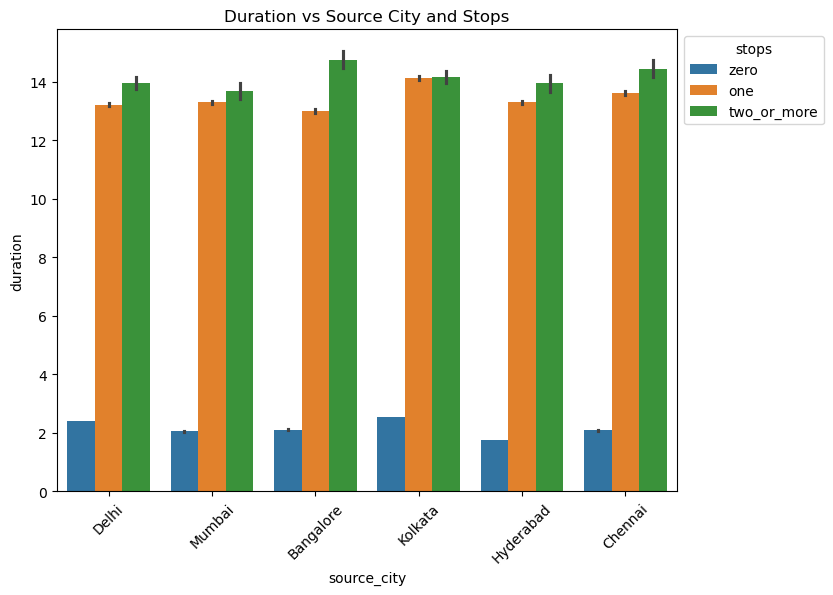

In [364]:
plt.figure(figsize=(8,6))
sns.barplot(x='source_city', y='duration', hue='stops', data=df)
plt.title('Duration vs Source City and Stops')
plt.xticks(rotation=45)
plt.legend(title='stops',bbox_to_anchor=(1,1))
plt.show()


#### Observation
- Hyderabd having the least duration time with zero stops among the other.
- While Bengalore and chennai having the highest avg duration with two or more stops may be they are less popular routes.

2. Price trend by airline and days_left

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='days_left', ylabel='price'>

Text(0.5, 1.0, 'Price Trend vs Days Left by Airline')

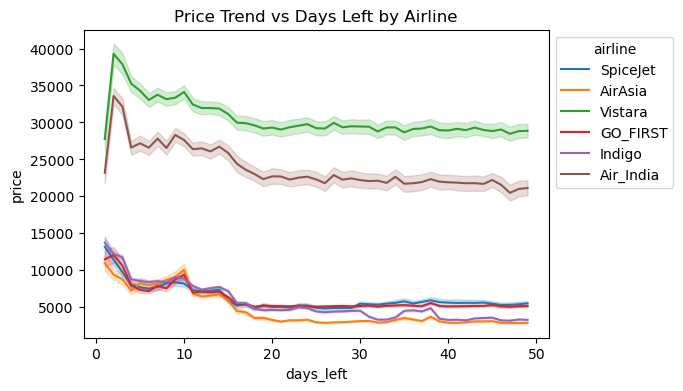

In [367]:
plt.figure(figsize=(6,4))
sns.lineplot(x='days_left', y='price', hue='airline', data=df)
plt.title('Price Trend vs Days Left by Airline')
plt.legend(title='airline',bbox_to_anchor=(1,1))
plt.show()


3. Correlation Heatmap.

<Axes: >

Text(0.5, 1.0, 'Correlation between Numerical Variables')

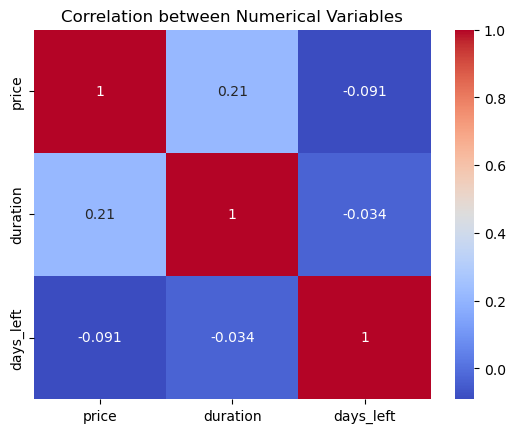

In [368]:
sns.heatmap(df[['price','duration','days_left']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Variables')
plt.show()


#### Observation
- As the flight duration increases the price increses very slightly.
- As we can see a weak negative correlation b/w price and days_left because the tickets are booked earlier to get cheap,as the travel date approaches the ticket price increase.